Simple GARCH Model is used for derivated pricing, risk management and portfolio optimisation.
    1. Periods of high volatility tend to cluster and;
    2. Variance error terms are autocorrelated.

There is a lot to volatility forecasting and a lot of sophisticated research and work has been done in this area. This notebook is just the start via the use of a GARCH model.

In [1]:
# import the required libraries required to fetch the financial data, undertake math functions and to forecast volatility
import numpy as np
import yfinance as yf
from arch import arch_model

In [2]:
# grab the stock specific data
data = yf.download("aapl", start="2020-01-01", end="2022-07-31")

[*********************100%***********************]  1 of 1 completed


In [3]:
# fit a GARCH model
# the use of a arch_model allows you to
#   assume a GARCH volatility model
#   to use a constant mean
#   to use normal distribution for the standardised errors
adjusted_closes = data['Adj Close']
returns = 100 * adjusted_closes.pct_change().dropna()

In [4]:
# once the model has been defined, it can be fit with the following
model = arch_model(returns)
res = model.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 2574.7444645755318
Iteration:      2,   Func. Count:     15,   Neg. LLF: 22627.100303949414
Iteration:      3,   Func. Count:     22,   Neg. LLF: 1786.8106209224038
Iteration:      4,   Func. Count:     29,   Neg. LLF: 1628.7597712584256
Iteration:      5,   Func. Count:     36,   Neg. LLF: 1391.3565600352304
Iteration:      6,   Func. Count:     42,   Neg. LLF: 1386.0239203006151
Iteration:      7,   Func. Count:     47,   Neg. LLF: 1386.0232875429117
Iteration:      8,   Func. Count:     52,   Neg. LLF: 1386.023256623082
Iteration:      9,   Func. Count:     57,   Neg. LLF: 1386.0232558006185
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1386.0232558006185
            Iterations: 9
            Function evaluations: 57
            Gradient evaluations: 9


In [5]:
# show the statistical significance of each of the coefficients
print(res.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:              Adj Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1386.02
Distribution:                  Normal   AIC:                           2780.05
Method:            Maximum Likelihood   BIC:                           2797.94
                                        No. Observations:                  648
Date:                Fri, Oct 14 2022   Df Residuals:                      647
Time:                        01:07:15   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.2180  7.860e-02      2.774  5.541e-03 [6.397e-0

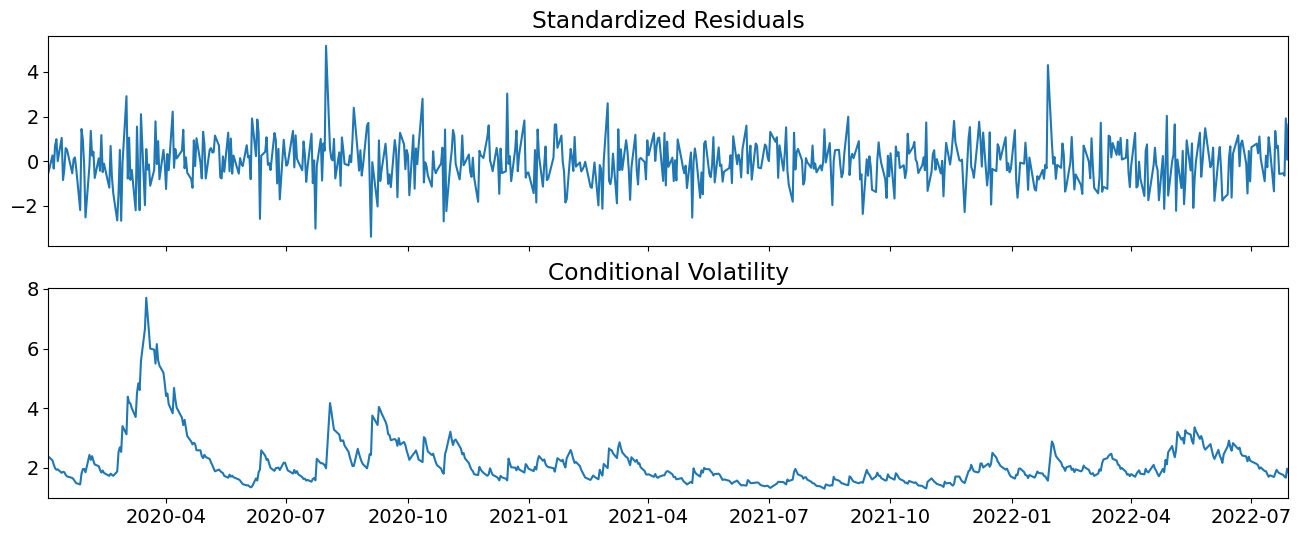

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc("figure", figsize=(16, 6))
plt.rc("savefig", dpi=90)
plt.rc("font", family="sans-serif")
plt.rc("font", size=14)

# create a visualisation of the standardised residuals and conditional volatility
fig = res.plot()

Forecasting Volatility

In [7]:
# get the variance forecast and take its square root for volatility then annualise it
# the number of forecasts can be controlled by using the horizon argument
forecast = res.forecast(horizon=1, reindex=False)
variance_forecast = forecast.variance.iloc[-1][0]
volatility_forecast = np.sqrt(variance_forecast)
annualised_volatility_forecast = (volatility_forecast * np.sqrt(252)/100) * 100
annualised_volatility_forecast

32.96117302376026